## Nama : Adri Sabik Muhana

## Alamat : Kasihan, Bantul, DIY

## Instansi : UPN Veteran Yogyakarta

## email : adrisabik@gmail.com

### **Dataset : IMDb movies extensive dataset**

### **link dataset : https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset**


---

## **Import Library**

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile

from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### **Import dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load dataset**

In [3]:
movie = pd.read_csv('drive/MyDrive/Datasets/IMDb Movie/IMDb movies.csv')
actor = pd.read_csv('drive/MyDrive/Datasets/IMDb Movie/IMDb names.csv')
rating = pd.read_csv('drive/MyDrive/Datasets/IMDb Movie/IMDb ratings.csv')
 
print('Jumlah film   : ', len(movie.imdb_title_id.unique()))
print('Jumlah actor  : ', len(actor.imdb_name_id.unique()))
print('Jumlah rating : ', len(rating.imdb_title_id.unique()))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Jumlah film   :  85855
Jumlah actor  :  297705
Jumlah rating :  85855


## **Explor variabel movie**

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

### **Drop data yang tidak digunakan**

In [5]:
movie.drop(['original_title', 'date_published', 'language', 'writer', 'production_company', 'description', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users', 'reviews_from_critics'], axis=1, inplace=True)

### **Membuat genre, country, dan actor menjadi satu**

In [6]:
# membuat genre menjadi 1
movie.genre = movie.genre.str.split(", ", expand = True)

# membuat country menjadi 1
movie.country = movie.country.str.split(", ", expand = True)

# membuat actor menjadi 1
movie.actors = movie.actors.str.split(", ", expand = True)

movie.head()

,imdb_title_id,title,year,genre,duration,country,director,actors
0,tt0000009,Miss Jerry,1894,Romance,45,USA,Alexander Black,Blanche Bayliss
1,tt0000574,The Story of the Kelly Gang,1906,Biography,70,Australia,Charles Tait,Elizabeth Tait
2,tt0001892,Den sorte drøm,1911,Drama,53,Germany,Urban Gad,Asta Nielsen
3,tt0002101,Cleopatra,1912,Drama,100,USA,Charles L. Gaskill,Helen Gardner
4,tt0002130,L'Inferno,1911,Adventure,68,Italy,"Francesco Bertolini, Adolfo Padovan",Salvatore Papa


### **Eksplor genre lebih jauh**

             jumlah sampel  persentase
Drama                25386        29.6
Comedy               24297        28.3
Action               12182        14.2
Crime                 5557         6.5
Horror                5113         6.0
Adventure             3599         4.2
Animation             2108         2.5
Biography             2067         2.4
Thriller              1375         1.6
Romance                767         0.9
Family                 638         0.7
Western                617         0.7
Mystery                593         0.7
Fantasy                502         0.6
Sci-Fi                 417         0.5
Musical                324         0.4
War                    107         0.1
History                 80         0.1
Music                   77         0.1
Film-Noir               29         0.0
Sport                   16         0.0
Adult                    2         0.0
Documentary              2         0.0


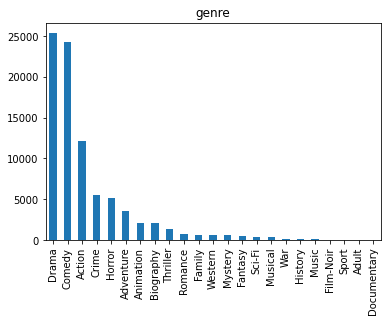

In [7]:
count = movie.genre.value_counts()
percent = 100*movie.genre.value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='genre');

In [8]:
print('Jumlah film : ', len(movie.imdb_title_id.unique()))
print('Jumlah direktor : ', len(movie.director.unique()))
print('Direktor        : ', movie.director.unique())
print('Jumlah aktor : ', len(movie.actors.unique()))
print('Jumlah aktor : ', movie.actors.unique())
print('Jumlah genre : ', len(movie.genre.unique()))
print('genre        : ', movie.genre.unique())

Jumlah film :  85855
Jumlah direktor :  34734
Direktor        :  ['Alexander Black' 'Charles Tait' 'Urban Gad' ... 'Ludovic Colbeau-Justin'
 'Vineesh Aaradya' 'Laura Jou']
Jumlah aktor :  37147
Jumlah aktor :  ['Blanche Bayliss' 'Elizabeth Tait' 'Asta Nielsen' ... 'Anoop Chandran'
 'Ahmet Faik Akinci' 'Maria Morera Colomer']
Jumlah genre :  23
genre        :  ['Romance' 'Biography' 'Drama' 'Adventure' 'History' 'Crime' 'Western'
 'Fantasy' 'Comedy' 'Horror' 'Family' 'Action' 'Mystery' 'Sci-Fi'
 'Animation' 'Thriller' 'Musical' 'Music' 'War' 'Film-Noir' 'Sport'
 'Adult' 'Documentary']


## **Eksplorasi variabel actor**

In [9]:
actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297705 entries, 0 to 297704
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   imdb_name_id           297705 non-null  object 
 1   name                   297705 non-null  object 
 2   birth_name             297705 non-null  object 
 3   height                 44681 non-null   float64
 4   bio                    204698 non-null  object 
 5   birth_details          110612 non-null  object 
 6   date_of_birth          110612 non-null  object 
 7   place_of_birth         103992 non-null  object 
 8   death_details          39933 non-null   object 
 9   date_of_death          39933 non-null   object 
 10  place_of_death         37038 non-null   object 
 11  reason_of_death        22694 non-null   object 
 12  spouses_string         45352 non-null   object 
 13  spouses                297705 non-null  int64  
 14  divorces               297705 non-nu

### **Drop data yang tidak digunakan**

In [10]:
actor = actor[['imdb_name_id', 'name']]
actor

,imdb_name_id,name
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
297700,nm5474275,Sunay Terzioglu
297701,nm5909653,Sung Lim Ju
297702,nm5993616,Coulee Nazha
297703,nm7634163,Ge Ou


In [11]:
print('Jumlah aktor   : ', len(actor.imdb_name_id.unique()))

Jumlah aktor   :  297705


### **Eksplorasi variabel rating**

In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

### **Drop data yang tidak digunakan**

In [13]:
rating = rating[['imdb_title_id', 'weighted_average_vote']]
rating = rating.rename(columns={'weighted_average_vote':'rating'})
rating

,imdb_title_id,rating
0,tt0000009,5.9
1,tt0000574,6.1
2,tt0001892,5.8
3,tt0002101,5.2
4,tt0002130,7.0
...,...,...
85850,tt9908390,5.3
85851,tt9911196,7.7
85852,tt9911774,7.9
85853,tt9914286,6.4


### **Melihat lebih jauh pada rating**

In [14]:
rating.describe()

,rating
count,85855.000000
mean,5.898656
std,1.234987
min,1.000000
25%,5.200000
50%,6.100000
75%,6.800000
max,9.900000


Bisa dilihat bahwa rating berkisar antara 1-10

In [15]:
print('Jumlah film yang diberi rating : ', len(rating.imdb_title_id.unique()))

Jumlah film yang diberi rating :  85855


## **Data Preparation**

In [16]:
# Definisikan dataframe rating ke dalam variabel all_movie_rate
all_movie_rate = rating
all_movie_rate

,imdb_title_id,rating
0,tt0000009,5.9
1,tt0000574,6.1
2,tt0001892,5.8
3,tt0002101,5.2
4,tt0002130,7.0
...,...,...
85850,tt9908390,5.3
85851,tt9911196,7.7
85852,tt9911774,7.9
85853,tt9914286,6.4


### **Menggabungkan data**

In [17]:
# Menggabungkan all_movie_rate dengan dataframe movie(title, genre) berdasarkan imdb_title_id
all_movie = pd.merge(all_movie_rate, movie[['imdb_title_id','title', 'genre']], on='imdb_title_id', how='left')
 
# Print dataframe all_movie
all_movie

,imdb_title_id,rating,title,genre
0,tt0000009,5.9,Miss Jerry,Romance
1,tt0000574,6.1,The Story of the Kelly Gang,Biography
2,tt0001892,5.8,Den sorte drøm,Drama
3,tt0002101,5.2,Cleopatra,Drama
4,tt0002130,7.0,L'Inferno,Adventure
...,...,...,...,...
85850,tt9908390,5.3,Le lion,Comedy
85851,tt9911196,7.7,De Beentjes van Sint-Hildegard,Comedy
85852,tt9911774,7.9,Padmavyuhathile Abhimanyu,Drama
85853,tt9914286,6.4,Sokagin Çocuklari,Drama


### **Mengecek missing value**

In [18]:
all_movie.isnull().sum()

imdb_title_id    0
rating           0
title            0
genre            0
dtype: int64

### **Mengurutkan data**

In [19]:
preparation = all_movie.sort_values('imdb_title_id', ascending=True)
preparation

,imdb_title_id,rating,title,genre
0,tt0000009,5.9,Miss Jerry,Romance
1,tt0000574,6.1,The Story of the Kelly Gang,Biography
2,tt0001892,5.8,Den sorte drøm,Drama
3,tt0002101,5.2,Cleopatra,Drama
4,tt0002130,7.0,L'Inferno,Adventure
...,...,...,...,...
85850,tt9908390,5.3,Le lion,Comedy
85851,tt9911196,7.7,De Beentjes van Sint-Hildegard,Comedy
85852,tt9911774,7.9,Padmavyuhathile Abhimanyu,Drama
85853,tt9914286,6.4,Sokagin Çocuklari,Drama


### **Mengurangi data karena crash ram tidak cukup**

Sebelumnya saya sudah mencoba beberapa cara tapi tidak bisa, jadi saya kurangi saja data yang saya pakai

In [20]:
preparation = preparation.drop(preparation.index[20000:])
preparation

,imdb_title_id,rating,title,genre
0,tt0000009,5.9,Miss Jerry,Romance
1,tt0000574,6.1,The Story of the Kelly Gang,Biography
2,tt0001892,5.8,Den sorte drøm,Drama
3,tt0002101,5.2,Cleopatra,Drama
4,tt0002130,7.0,L'Inferno,Adventure
...,...,...,...,...
19995,tt0082622,6.3,Knightriders,Action
19996,tt0082627,7.4,Kopaszkutya,Drama
19997,tt0082633,7.2,Kundskabens træ,Drama
19998,tt0082639,6.8,"Ladies and Gentlemen, the Fabulous Stains",Comedy


### **Mengecek kategori genre**

In [21]:
preparation.genre.unique()

array(['Romance', 'Biography', 'Drama', 'Adventure', 'History', 'Crime',
       'Western', 'Fantasy', 'Comedy', 'Horror', 'Family', 'Action',
       'Mystery', 'Sci-Fi', 'Animation', 'Thriller', 'Musical', 'Music',
       'War', 'Film-Noir', 'Sport', 'Adult'], dtype=object)

### **Konversi data ke list**

In [22]:
# Mengonversi data series ‘imdb_title_id’ menjadi dalam bentuk list
movie_id = preparation['imdb_title_id'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()
 
# Mengonversi data series ‘genre’ menjadi dalam bentuk list
movie_genre = preparation['genre'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

20000
20000
20000


### **Membuat dictionary**

In [23]:
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_name,
    'genre': movie_genre
})
movie_new

,id,title,genre
0,tt0000009,Miss Jerry,Romance
1,tt0000574,The Story of the Kelly Gang,Biography
2,tt0001892,Den sorte drøm,Drama
3,tt0002101,Cleopatra,Drama
4,tt0002130,L'Inferno,Adventure
...,...,...,...
19995,tt0082622,Knightriders,Action
19996,tt0082627,Kopaszkutya,Drama
19997,tt0082633,Kundskabens træ,Drama
19998,tt0082639,"Ladies and Gentlemen, the Fabulous Stains",Comedy


## **Pemodelan dengan Content Based Filtering**

### **Menggunakan teknik TF-IDF Vectorizer**

In [24]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada movie_new genre
tf.fit(movie_new['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'fi',
 'film',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'sport',
 'thriller',
 'war',
 'western']

### **Melakukan fit lalu ditransformasikan ke bentuk matrix**

In [25]:
tfidf_matrix = tf.fit_transform(movie_new['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(20000, 24)

### **Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()**

In [26]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### **Membuat dataframe untuk melihat tf-idf matrix**

In [27]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=movie_new.title
).sample(22, axis=1).sample(10, axis=0)

,fantasy,animation,film,history,fi,musical,romance,family,noir,horror,thriller,sci,biography,sport,action,comedy,drama,western,war,adventure,mystery,music
title,,,,,,,,,,,,,,,,,,,,,,
Camelot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Gli eroi dell'isola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
The Falcon in Hollywood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Las flores del vicio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Dalle Ardenne all'inferno,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"Mean Streets - Domenica in chiesa, lunedì all'inferno",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3 delitti per padre Brown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Oggi sposi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Le deportate della sezione speciale SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **Menghitung cosine similarity pada matrix tf-idf**

In [28]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.]])

### **Membuat dataframe dari variabel cosine_sim**

In [29]:
# baris dan kolom nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['title'], columns=movie_new['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


title,Stagecoach Kid,Mi querida señorita,Criminal Face - Storia di un criminale,Anno 2118: progetto X,Osen
title,,,,,
Come rubai mia moglie,0.0,0.0,0.0,0.0,0.0
Gold - il segno del potere,0.0,0.0,0.0,0.0,0.0
L'indossatrice,0.0,0.0,0.0,0.0,0.0
S*P*Y*S,1.0,0.0,0.0,0.0,0.0
I quattro diavoli,0.0,0.0,0.0,0.0,0.0
Una giornata spesa bene,0.0,0.0,0.0,0.0,0.0
Every Afternoon,0.0,0.0,0.0,0.0,0.0
The Hoodlum,0.0,0.0,0.0,0.0,0.0
Testa o croce,0.0,0.0,0.0,0.0,0.0


### **Membuat fungsi movie_recommendations**

In [30]:
def movie_recommendations(movie_name, similarity_data=cosine_sim_df, items=movie_new[['title', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop movie_name agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

### **Evaluation**

In [31]:
movie_new[movie_new.title.eq('Ginger')]

,id,title,genre
14967,tt0067133,Ginger,Action


In [32]:
# Mendapatkan rekomendasi film yang mirip dengan Ginger
movie_recommendations('Ginger')

,title,genre
0,Piedone l'africano,Action
1,Il corsaro della Giamaica,Action
2,Agente 007 - Licenza di uccidere,Action
3,La frontiera senza legge,Action
4,Tien ya ming yue dao,Action
5,Polizia militare,Action
6,Samantha Fox missione Manila,Action
7,Come on Danger,Action
8,La spia che non fece ritorno,Action
9,Naviganti coraggiosi,Action
